### Divvy_Exercise_Full_Year_Analysis ###
This analysis is based on the Divvy case study "'Sophisticated, Clear, and Polished’: Divvy and Data Visualization" written by Kevin Hartman (found here: https://artscience.blog/home/divvy-dataviz-case-study). The purpose of this script is to consolidate downloaded Divvy data into a single dataframe and then conduct simple analysis to help answer the key question: “In what ways do members and casual riders use Divvy bikes differently?”

##### STEP 1: COLLECT DATA AND COMBINE INTO A SINGLE DF

In [1]:
# Install required packages
# install.packages("tidyverse")
# install.packages("lubridate")
# install.packages("ggplot2")
# install.packages("ggmap")

library(tidyverse)  # helps wrangle data
library(lubridate)  # wrangle date attributes
library(ggplot2)    # visualize data
library(ggmap)      # plot on map

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


ℹ Google's Terms of Service: <https://mapsplatform.google.com>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.


In [2]:
# upload Divvy datasets from csv
df1 <- read_csv(file.path(getwd(), 'data', '202212-divvy-tripdata.csv'))
df2 <- read_csv(file.path(getwd(), 'data', '202301-divvy-tripdata.csv'))
df3 <- read_csv(file.path(getwd(), 'data', '202302-divvy-tripdata.csv'))

Rows: 181806 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 190301 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 190445 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

In [3]:
# ways to get look on data
glimpse(df1)
# str(df1)
# colnames(df1)

Rows: 181,806
Columns: 13
$ ride_id            <chr> "65DBD2F447EC51C2", "0C201AA7EA0EA1AD", "E0B148CCB3…
$ rideable_type      <chr> "electric_bike", "classic_bike", "electric_bike", "…
$ started_at         <dttm> 2022-12-05 10:47:18, 2022-12-18 06:42:33, 2022-12-…
$ ended_at           <dttm> 2022-12-05 10:56:34, 2022-12-18 07:08:44, 2022-12-…
$ start_station_name <chr> "Clifton Ave & Armitage Ave", "Broadway & Belmont A…
$ start_station_id   <chr> "TA1307000163", "13277", "TA1306000015", "KA1503000…
$ end_station_name   <chr> "Sedgwick St & Webster Ave", "Sedgwick St & Webster…
$ end_station_id     <chr> "13191", "13191", "13016", "13134", "13288", "KA150…
$ start_lat          <dbl> 41.91824, 41.94011, 41.88592, 41.83846, 41.89595, 4…
$ start_lng          <dbl> -87.65711, -87.64545, -87.65113, -87.63541, -87.667…
$ end_lat            <dbl> 41.92217, 41.92217, 41.89435, 41.88137, 41.92008, 4…
$ end_lng            <dbl> -87.63889, -87.63889, -87.62280, -87.67493, -87.677…
$ member_casua

In [4]:
# make sure column names are the same
for (df in list(df1, df2, df3)) {
  print(colnames(df))
  cat("\n")  # new line
}

 [1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"     

 [1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"     

 [1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"     



In [5]:
df <- bind_rows(df1, df2, df3)  # combine in one df
nrow(df1) + nrow(df2) + nrow(df3)
nrow(df)

[1] 562552

[1] 562552

##### STEP 2: CLEAN DATA TO PREPARE FOR ANALYSIS

In [6]:
# check if category columns use the same labels
unique(df$member_casual)
unique(df$rideable_type)

[1] "member" "casual"

[1] "electric_bike" "classic_bike"  "docked_bike"

In [7]:
# there can be missing values in some columns, delete such a records
df <- df[complete.cases(df), ]
nrow(df)

[1] 433247

In [8]:
# extract date parts into separate columns
df$date <- as.Date(df$started_at)  # The default format is yyyy-mm-dd
df$day_of_week <- format(as.Date(df$date), "%A")

# calculate length of ride and make it numeric
df$ride_length <- difftime(df$ended_at, df$started_at)
df$ride_length <- as.numeric(as.character(df$ride_length))
# covert seconds to minutes and round
df$ride_length <- round(df$ride_length / 60)

In [12]:
# non-positive ride length is due to errors
df <- df[! df$ride_length <= 0,]
nrow(df)

[1] 426297

##### STEP 3: CONDUCT DESCRIPTIVE ANALYSIS

In [10]:
# how many records for each user type
table(df$member_casual)

# stats for ride_length
summary(df$ride_length)

# compare median ride_length
aggregate(df$ride_length ~ df$member_casual, FUN=mean)


casual member 
 92788 333509 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    5.00    8.00   11.61   13.00 1498.00 

df$member_casual,df$ride_length
<chr>,<dbl>
casual,16.03042
member,10.38484


In [11]:
# order days of week
df$day_of_week <- ordered(df$day_of_week, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

# average ride_length by week day by user type
aggregate(round(ride_length) ~ member_casual + day_of_week, data=df, FUN=mean)

# number of rides by week day by user type
aggregate(ride_id ~ member_casual + day_of_week, data=df, FUN=length)

member_casual,day_of_week,round(ride_length)
<chr>,<ord>,<dbl>
casual,Monday,15.187351
member,Monday,10.150109
casual,Tuesday,13.592679
member,Tuesday,10.019499
casual,Wednesday,13.705545
member,Wednesday,10.127954
casual,Thursday,14.333942
member,Thursday,9.916291
casual,Friday,15.149458


member_casual,day_of_week,ride_id
<chr>,<ord>,<int>
casual,Monday,12602
member,Monday,51063
casual,Tuesday,14151
member,Tuesday,62874
casual,Wednesday,11669
member,Wednesday,51456
casual,Thursday,12053
member,Thursday,52157
casual,Friday,11535


##### STEP 4: PLOT

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


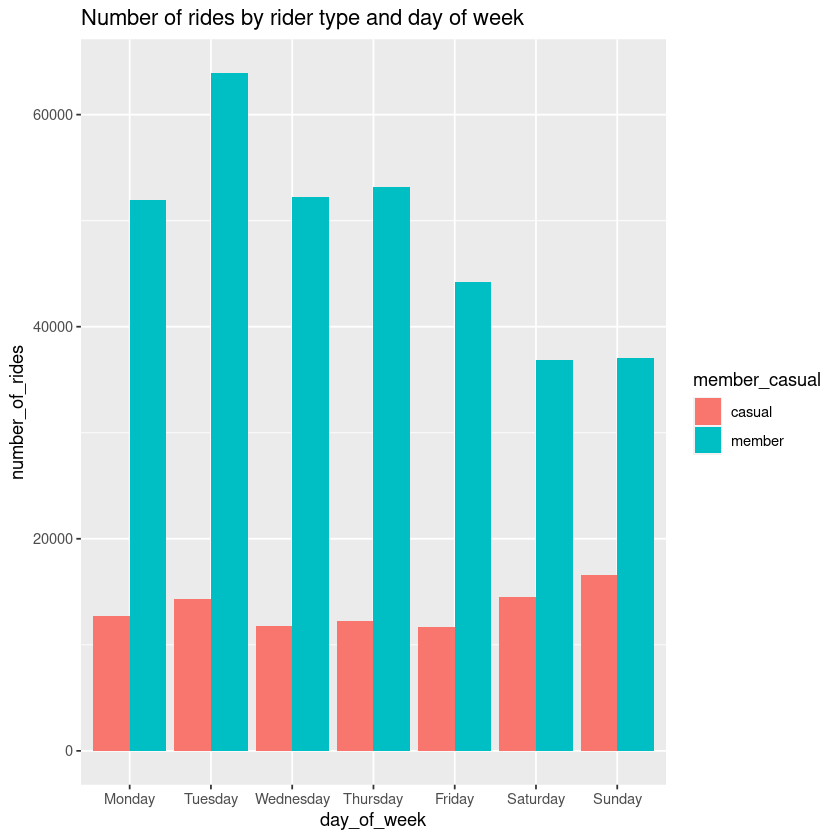

In [12]:
# plot number of rides by week day by user type
df %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides=n()) %>% 
  arrange(member_casual, day_of_week)  %>% 
  ggplot(aes(x=day_of_week, y=number_of_rides, fill=member_casual)) +
  geom_col(position="dodge") +
  ggtitle("Number of rides by rider type and day of week")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


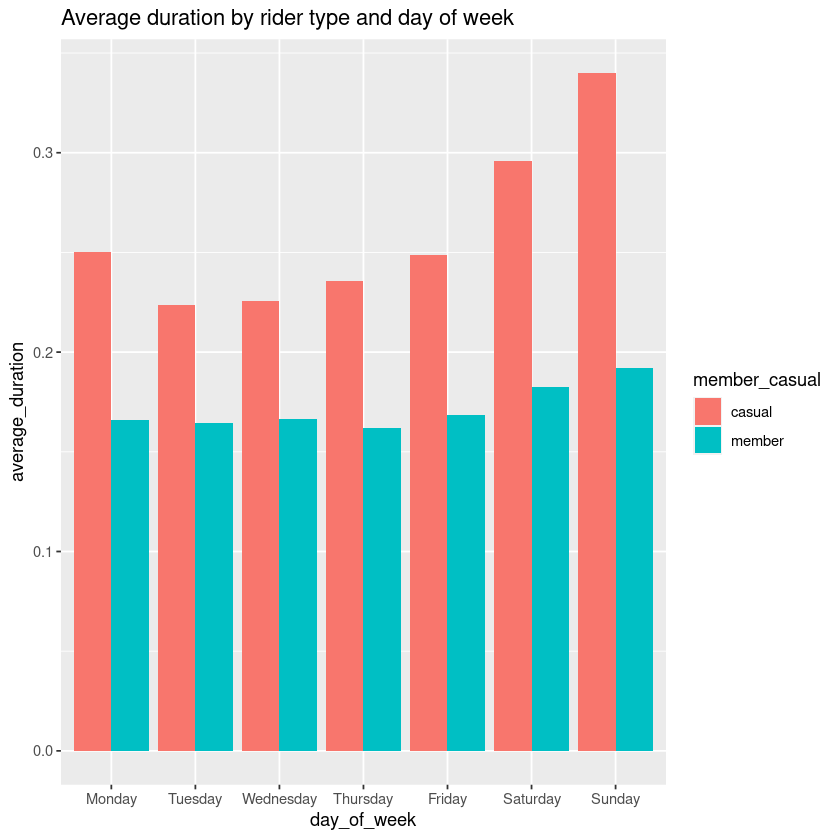

In [13]:
# average ride_length by week day by user type
df %>% 
  group_by(member_casual, day_of_week) %>% 
  summarise(average_duration=mean(ride_length) / 60) %>% 
  arrange(member_casual, day_of_week)  %>% 
  ggplot(aes(x=day_of_week, y=average_duration, fill=member_casual)) +
  geom_col(position="dodge") +
  ggtitle("Average duration by rider type and day of week")

`summarise()` has grouped output by 'start_station_id', 'start_lat',
'start_lng'. You can override using the `.groups` argument.
ℹ Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.

ℹ 85 tiles needed, this may take a while (try a smaller zoom?)



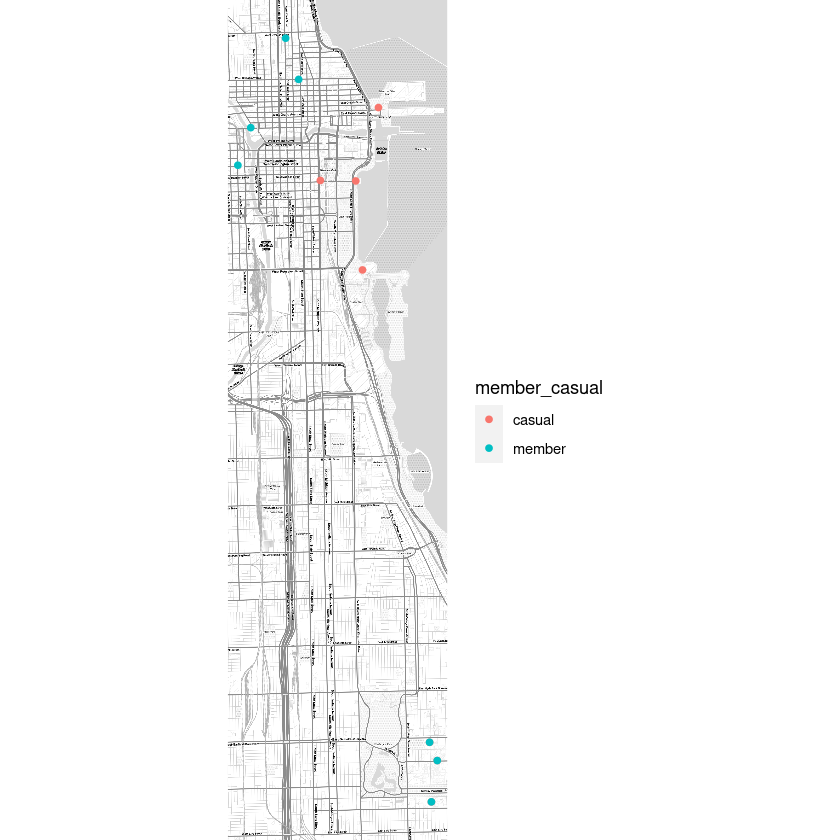

In [14]:
# select top 7 popular start locations
popular_starts_df <- df %>% 
  group_by(start_station_id, start_lat, start_lng, member_casual) %>% 
  summarise(number_of_rides=n()) %>%
  group_by(member_casual) %>%
  top_n(7, number_of_rides)

# plot them om=n map
qmplot(start_lng, start_lat, color=member_casual, data=popular_starts_df, zoom=15)

##### STEP 5: EXPORT SUMMARY FILE FOR FURTHER ANALYSIS

In [15]:
counts <- aggregate(df$ride_length ~ df$member_casual + df$day_of_week, FUN=mean)
write.csv(counts, file='avg_ride_length.csv')

##### Conclusions
The original question was "How do annual members and casual riders use Cyclistic bikes differently?"
Lets name users with member_casual = 'casual' as casual riders and users with member_casual = 'member' as subscribers.

- the number of rides made by subscribers several times higher than by casual riders
- while subscribers make less rides on a weekens, casual riders tend to make more
- average duration of ride of subscriber (~ 10 min) is less than average duration of ride of casual rider (~ 15 min)
- popular casual riders start locations seems to be along city embankment

As a hypothesis we can say that subscribers use bikes to get to work while casual riders cycling at leisure